## Práctica Clustering Particional

Grupo formado por:
 - Javier Asensio
 - Martín de las Heras
 - Daniel Serrano
 - Elena Tornero

En esta práctica vamos a testear técnicas de clustering particional. Para ello vamos a trabajar con una muestra del dataset de los dígitos que cargaremos desde sklearn.datasets.

In [1]:
from collections import Counter
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import warnings
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib import cm
import numpy as np
from prettytable import PrettyTable

In [2]:
digits = load_digits()

Una vez cargados, end digits.data tendremos el valor de los pixeles de las imágenes y en digits.target la categoría  a la que pertenecen.

<Figure size 640x480 with 0 Axes>

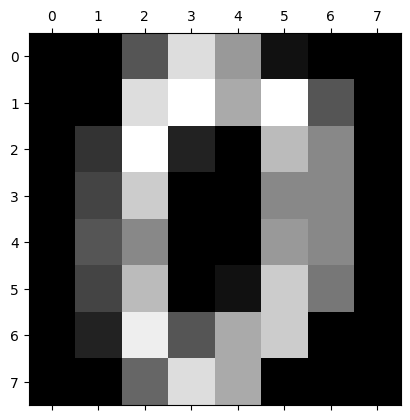

In [3]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

A pesar de tener los valores de las distintas categorías, no vamos a usar esta información a la hora de clusterizar dicha información, simplemente la usaremos para comprobar a posteriori la calidad de la clusterización.

Para ello deberéis desarrollar una función que tenga como entrada el clúster al que asocia a cada muestra y las categorías que tienen en realidad las muestras e imprima por pantalla el número del cluster, el número de categorías que aparecen en el clúster, el procentaje de instancias de la categoría mayoritaria y la entropía de la misma (-sumatorio del porcentaje de las instancias de cada categoría que aparece en el cluster multiplicado por el logaritmo de dicho porcentaje).

$Entropy=-\sum_{i=1}^{N}p_{i}\cdot log(p_{i})$

Por ejemplo, si para el clúster 1 aparecen 5 elementos del dígito 2, 7 del 3 y 2 del 4, debería imprimirse por pantalla

Clúster 1

% clase mayoritaria- el valor de 7/(7+5+2)

Entropía el valor de -(2/14·log(2/14)+7/14·log(7/14)+5/14·log(5/14))


Y así con todos los clústers

Lo primero que deberás hacer es definir el gráfico del método del codo. A partir del mismo deberás analizar cuántos clústers parecen un número prometedor de los mismos.

Realice el cálculo con 10 pasadas para cada iteración, un número máximo de 50 iteraciones y una tolerancia de 0.001. Para tener repetitibilidad, fije la semilla inicial a un valor de su elección y grafique el resultado obtenido.



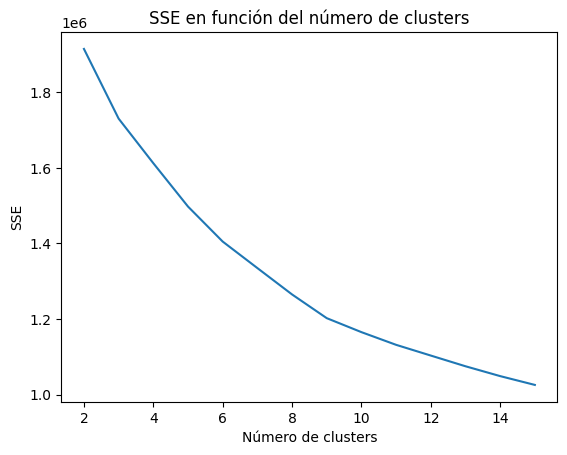

In [4]:
inertia = []

for n_clusters in range(2, 16):
    kmeans = KMeans(n_clusters=n_clusters, 
                    n_init=10, 
                    max_iter=50, 
                    tol=0.001, 
                    random_state=123)
    kmeans.fit(digits.data)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 16), inertia)
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('SSE en función del número de clusters');

Indique el número de clusters que ha seleccionado y realice el proceso de clustering con dicho número de clusters.

In [5]:
n_clusters = 9

kmeans = KMeans(n_clusters=n_clusters, 
                    n_init=10, 
                    max_iter=50, 
                    tol=0.001, 
                    random_state=123)
kmeans.fit(digits.data)

KMeans(max_iter=50, n_clusters=9, n_init=10, random_state=123, tol=0.001)

Imprime por pantalla la calidad de la separación obtenida usando la función que ha desarrollado con anterioridad.

In [6]:
df = pd.DataFrame({'labels': kmeans.labels_, 'target': digits.target})
df_cluster = df.groupby(['labels']).value_counts()

cluster_table = PrettyTable(['Cluster', 'Nº Clases', '% Clase mayoritaria', 'Entropía'])

for i in range(n_clusters):
    cluster_size = df_cluster[i].sum()
    cluster_table.add_row([
        i,
        df_cluster[i].count(),
        round(df_cluster[i].max()/cluster_size*100, 2), 
        round(-np.dot(np.log(np.array(df_cluster[i])/cluster_size), np.array(df_cluster[i])/cluster_size), 4)
        ])

print(cluster_table)

+---------+-----------+---------------------+----------+
| Cluster | Nº Clases | % Clase mayoritaria | Entropía |
+---------+-----------+---------------------+----------+
|    0    |     4     |        96.72        |  0.1803  |
|    1    |     6     |        86.42        |  0.5906  |
|    2    |     5     |        40.54        |  1.3088  |
|    3    |     3     |        98.79        |  0.0739  |
|    4    |     6     |        83.74        |  0.6951  |
|    5    |     7     |        46.19        |  1.0722  |
|    6    |     4     |        98.33        |  0.1031  |
|    7    |     4     |        83.43        |  0.5376  |
|    8    |     7     |        59.14        |  1.2266  |
+---------+-----------+---------------------+----------+


## Silhouette 
Imprima por pantalla el coeficiente de silueta para el número de clústers que ha seleccionado y grafique el mismo para el número de clústers seleccionado

Silhouette score para 9 clusters: 0.1890


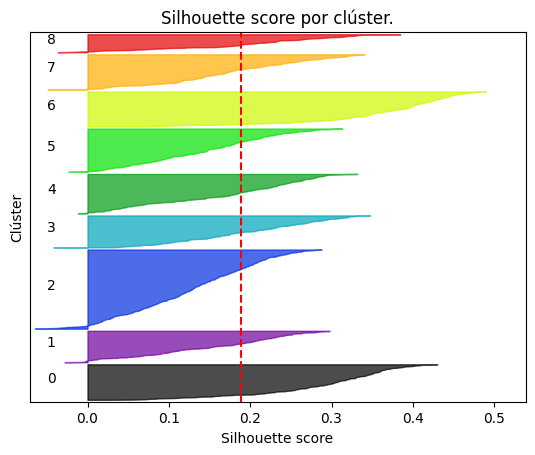

In [7]:
print(f'Silhouette score para 9 clusters: {silhouette_score(digits.data, kmeans.labels_):.4f}')

silhouette_values = silhouette_samples(digits.data, kmeans.labels_)
plt.xlim([min(silhouette_values)*1.1, max(silhouette_values)*1.1])
plt.ylim([0, len(digits.data) + (n_clusters + 1) * 10])

y_lower = 10
for i in range(n_clusters):

    ith_cluster_silhouette_values = silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]

    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title("Silhouette score por clúster.")
plt.xlabel("Silhouette score")
plt.ylabel("Clúster")

plt.axvline(silhouette_score(digits.data, kmeans.labels_), color="red", linestyle="--")

plt.yticks([]);

Dibuje, asimismo, el valor de cada silhouette coefficient para cada punto para ver su cercanía con el resto de puntos de su grupo y con los del grupo más cercano

Plotee el silhouette score para un número de clusters entre 5 y 15 para evaluar el comportamiento del mismo ante distinto número de clústers

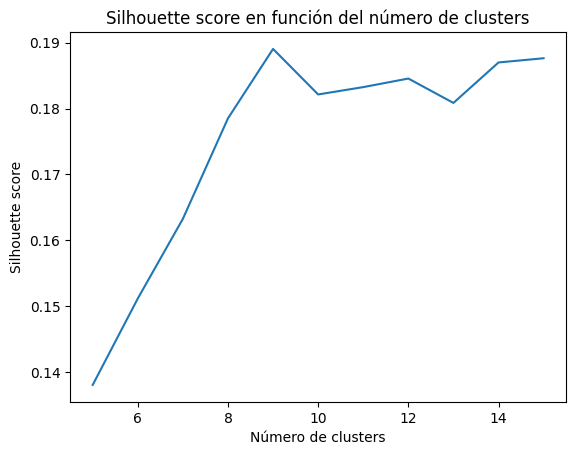

In [8]:
scores = []

for n_clusters in range(5, 16):
    kmeans = KMeans(n_clusters=n_clusters, 
                    n_init=10, 
                    max_iter=50, 
                    tol=0.001, 
                    random_state=123)
    kmeans.fit(digits.data)
    scores.append(silhouette_score(digits.data, kmeans.labels_))

plt.plot(range(5, 16), scores)
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score en función del número de clusters');

## Nuevo dataset

Ahora vamos a trabajar con un dataset un poco diferente.

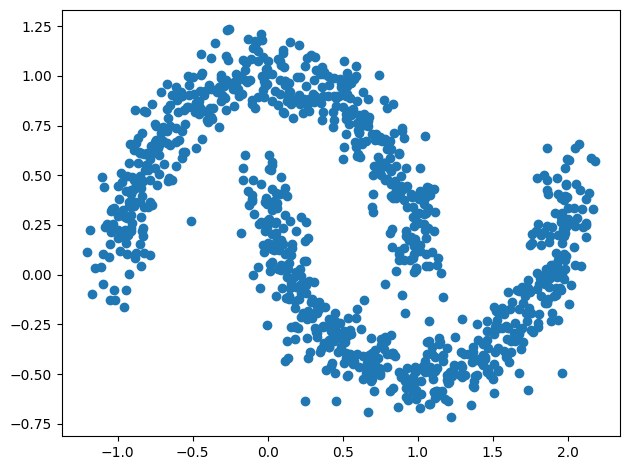

In [9]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.1, random_state=1234)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

En este caso, podríamos ver cómo un Kmeans clásico quizá no daría un resultado adecuado

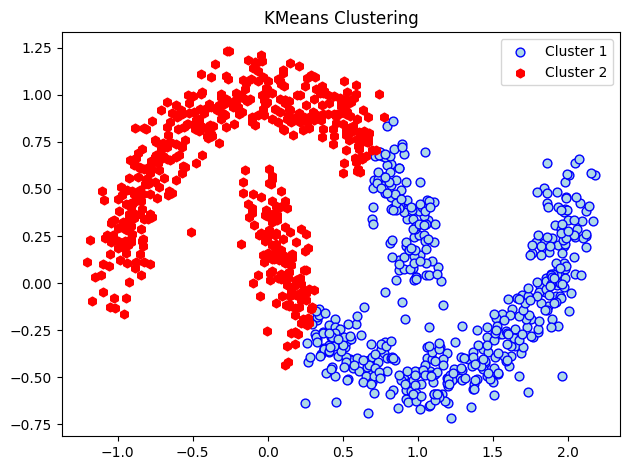

In [10]:
n_init = 10
max_iter=300
random_state=1234
tol=0.01
kmeans = KMeans(n_clusters=2, 
                n_init=n_init, 
                max_iter=max_iter, 
                tol=tol, 
                random_state=random_state)

kmeans.fit(X)
y_km = kmeans.predict(X)
plt.scatter(X[y_km == 0, 0],X[y_km == 0, 1],c='lightblue',edgecolor='blue',marker='o',s=40,label='Cluster 1')
plt.scatter(X[y_km == 1, 0],X[y_km == 1, 1],c='red',edgecolor='red',marker='h',s=40,label='Cluster 2')
plt.legend()
plt.title('KMeans Clustering')
plt.tight_layout()
plt.show()

De las metodologías que hemos visto, propón una metodología que consideras que pudiese adecuarse a este set de datos. Grafique la clusterización obtenida. 

Una metodología que se podría usar sería el K-Means Kernel, utilizando un kernel *rbf*. Esto nos daría el siguiente resultado:

C:\Users\Marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 1000 1-dimensional timeseries
  warnings.warn(


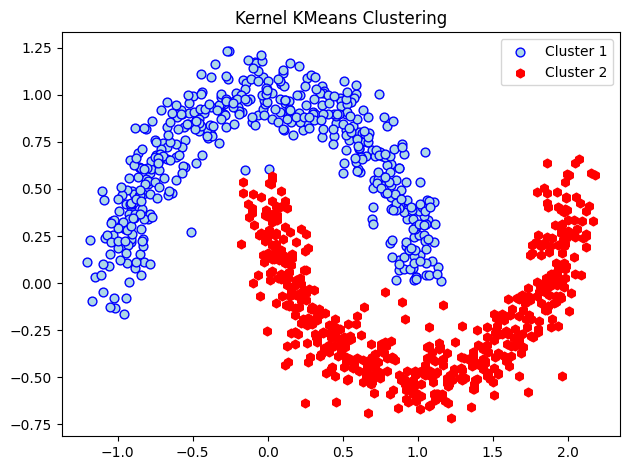

In [16]:
from tslearn.clustering import KernelKMeans

kernel_km = KernelKMeans(n_clusters=2, 
                        n_init=n_init, 
                        max_iter=max_iter, 
                        random_state=random_state, 
                        tol=tol, 
                        kernel="rbf", 
                        kernel_params={"gamma": 10})
                        
y_kernel_km = kernel_km.fit_predict(X)

plt.scatter(X[y_kernel_km == 0, 0],X[y_kernel_km == 0, 1],c='lightblue',edgecolor='blue',marker='o',s=40,label='Cluster 1')
plt.scatter(X[y_kernel_km == 1, 0],X[y_kernel_km == 1, 1],c='red',edgecolor='red',marker='h',s=40,label='Cluster 2')
plt.legend()
plt.title('Kernel KMeans Clustering')
plt.tight_layout();
plt.show();

A continuación probaremos con el enfoque Gaussiano, en principio no debería ser el adecuado, pero veremos qué tal funciona.

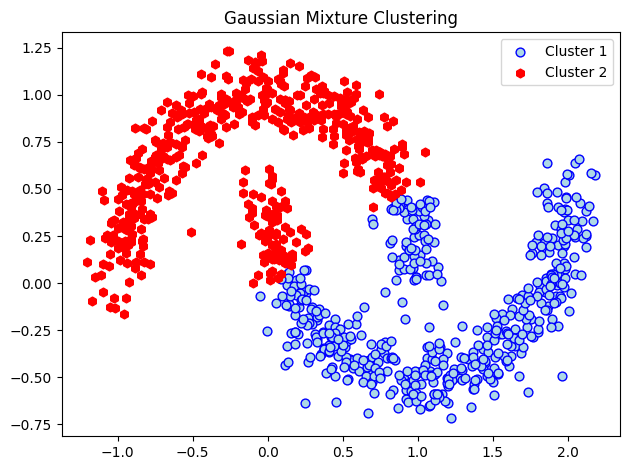

In [12]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=random_state, tol=tol, max_iter=max_iter, n_init=n_init)
gm.fit(X)
y_gm = gm.predict(X)

plt.scatter(X[y_gm == 0, 0],X[y_gm == 0, 1],c='lightblue',edgecolor='blue',marker='o',s=40,label='Cluster 1')
plt.scatter(X[y_gm == 1, 0],X[y_gm == 1, 1],c='red',edgecolor='red',marker='h',s=40,label='Cluster 2')
plt.legend()
plt.title('Gaussian Mixture Clustering')
plt.tight_layout()
plt.show();